In [1]:
import pandas as pd
filmes = pd.read_csv('movies.csv')
filmes.columns=['filmeId', 'titulo', 'generos']
filmes = filmes.set_index('filmeId')
filmes.head()

,titulo,generos
filmeId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [2]:
notas = pd.read_csv('ratings.csv')
notas.columns=['usuarioId', 'filmeId', 'nota', 'momento']
notas.head()

,usuarioId,filmeId,nota,momento
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [3]:
notas.describe()

,usuarioId,filmeId,nota,momento
count,100836.000000,100836.000000,100836.000000,1.008360e+05
mean,326.127564,19435.295718,3.501557,1.205946e+09
std,182.618491,35530.987199,1.042529,2.162610e+08
min,1.000000,1.000000,0.500000,8.281246e+08
25%,177.000000,1199.000000,3.000000,1.019124e+09
50%,325.000000,2991.000000,3.500000,1.186087e+09
75%,477.000000,8122.000000,4.000000,1.435994e+09
max,610.000000,193609.000000,5.000000,1.537799e+09


#Primeira tentativa de recomendação: Heurística de total de votos

In [4]:
total_votos = notas['filmeId'].value_counts()
total_votos.head()

356     329
318     317
296     307
593     279
2571    278
Name: filmeId, dtype: int64

In [5]:
filmes['total_votos'] = total_votos
filmes.head()

,titulo,generos,total_votos
filmeId,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0
2,Jumanji (1995),Adventure|Children|Fantasy,110.0
3,Grumpier Old Men (1995),Comedy|Romance,52.0
4,Waiting to Exhale (1995),Comedy|Drama|Romance,7.0
5,Father of the Bride Part II (1995),Comedy,49.0


In [6]:
filmes.sort_values('total_votos', ascending=False).head()

,titulo,generos,total_votos
filmeId,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0


In [7]:
notas_medias = notas.groupby('filmeId').mean()['nota']

In [8]:
filmes['nota_media'] = notas_medias
filmes.sort_values('total_votos', ascending=False).head(10)

,titulo,generos,total_votos,nota_media
filmeId,,,,
356,Forrest Gump (1994),Comedy|Drama|Romance|War,329.0,4.164134
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
296,Pulp Fiction (1994),Comedy|Crime|Drama|Thriller,307.0,4.197068
593,"Silence of the Lambs, The (1991)",Crime|Horror|Thriller,279.0,4.161290
2571,"Matrix, The (1999)",Action|Sci-Fi|Thriller,278.0,4.192446
260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Sci-Fi,251.0,4.231076
480,Jurassic Park (1993),Action|Adventure|Sci-Fi|Thriller,238.0,3.750000
110,Braveheart (1995),Action|Drama|War,237.0,4.031646
589,Terminator 2: Judgment Day (1991),Action|Sci-Fi,224.0,3.970982


#Segunda Heurística: Nota média e quantidade de votos

In [9]:
filmes.sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_votos,nota_media
filmeId,,,,
88448,Paper Birds (Pájaros de papel) (2010),Comedy|Drama,1.0,5.0
100556,"Act of Killing, The (2012)",Documentary,1.0,5.0
143031,Jump In! (2007),Comedy|Drama|Romance,1.0,5.0
143511,Human (2015),Documentary,1.0,5.0
143559,L.A. Slasher (2015),Comedy|Crime|Fantasy,1.0,5.0
6201,Lady Jane (1986),Drama|Romance,1.0,5.0
102217,Bill Hicks: Revelations (1993),Comedy,1.0,5.0
102084,Justice League: Doom (2012),Action|Animation|Fantasy,1.0,5.0
6192,Open Hearts (Elsker dig for evigt) (2002),Romance,1.0,5.0


In [10]:
filmes.query('total_votos >= 10').sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_votos,nota_media
filmeId,,,,
1041,Secrets & Lies (1996),Drama,11.0,4.590909
3451,Guess Who's Coming to Dinner (1967),Drama,11.0,4.545455
1178,Paths of Glory (1957),Drama|War,12.0,4.541667
1104,"Streetcar Named Desire, A (1951)",Drama,20.0,4.475000
2360,"Celebration, The (Festen) (1998)",Drama,12.0,4.458333
1217,Ran (1985),Drama|War,15.0,4.433333
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
951,His Girl Friday (1940),Comedy|Romance,14.0,4.392857
1927,All Quiet on the Western Front (1930),Action|Drama|War,10.0,4.350000


In [11]:
filmes_mais_50_votos = filmes.query('total_votos >= 50')
filmes_mais_50_votos.sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_votos,nota_media
filmeId,,,,
318,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
858,"Godfather, The (1972)",Crime|Drama,192.0,4.289062
2959,Fight Club (1999),Action|Crime|Drama|Thriller,218.0,4.272936
1276,Cool Hand Luke (1967),Drama,57.0,4.271930
750,Dr. Strangelove or: How I Learned to Stop Worr...,Comedy|War,97.0,4.268041
904,Rear Window (1954),Mystery|Thriller,84.0,4.261905
1221,"Godfather: Part II, The (1974)",Crime|Drama,129.0,4.259690
48516,"Departed, The (2006)",Crime|Drama|Thriller,107.0,4.252336
1213,Goodfellas (1990),Crime|Drama,126.0,4.250000


In [12]:
eu_assisti = [1, 21, 19, 10, 11, 7, 2]
filmes.loc[eu_assisti]

,titulo,generos,total_votos,nota_media
filmeId,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,215.0,3.920930
21,Get Shorty (1995),Comedy|Crime|Thriller,89.0,3.494382
19,Ace Ventura: When Nature Calls (1995),Comedy,88.0,2.727273
10,GoldenEye (1995),Action|Adventure|Thriller,132.0,3.496212
11,"American President, The (1995)",Comedy|Drama|Romance,70.0,3.671429
7,Sabrina (1995),Comedy|Romance,54.0,3.185185
2,Jumanji (1995),Adventure|Children|Fantasy,110.0,3.431818


In [13]:
aventura_infantil_fantasia = filmes_mais_50_votos.query("generos == 'Adventure|Children|Fantasy'")
aventura_infantil_fantasia.drop(eu_assisti, errors='ignore').sort_values('nota_media', ascending=False).head(10)

,titulo,generos,total_votos,nota_media
filmeId,,,,
4896,Harry Potter and the Sorcerer's Stone (a.k.a. ...,Adventure|Children|Fantasy,107.0,3.761682
41566,"Chronicles of Narnia: The Lion, the Witch and ...",Adventure|Children|Fantasy,62.0,3.443548


# Procurar usuários similares

- joao deu nota 4 para Toy Story
- maria deu nota 5 para Toy Story
- paulo deu nota 3 para Toy Story
- joana de unota 3.5 para Toy Story

Calcular a distancia: x-y ==> Distancia

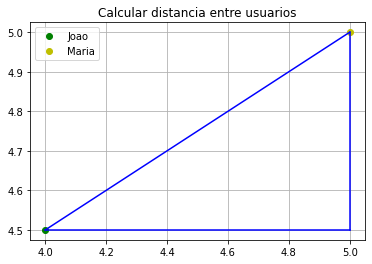

In [14]:
# joao = [4, 4.5]
# maria = [5, 5]
# joaquina [3.5, 4.5]

import matplotlib.pyplot as plt
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.grid()
plt.legend(['Joao', 'Maria'])
plt.title('Calcular distancia entre usuarios')

plt.plot([4, 5], [4.5, 4.5], color='b', linestyle='-')
plt.plot([4, 5], [4.5, 5], color='b', linestyle='-')
plt.plot([5, 5], [4.5, 5], color='b', linestyle='-')

In [15]:
import numpy as np
joao = np.array([4, 4.5])
maria = np.array([5, 5])
joao-maria

array([-1. , -0.5])

In [16]:
from math import sqrt
def pitagoras(a, b):
  (delta_x, delta_y) = a - b
  return sqrt(delta_x*delta_x + delta_y*delta_y)

In [17]:
pitagoras(joao, maria)

1.118033988749895

In [18]:
def pitagoras(a,b):
  return np.linalg.norm(a-b)

In [19]:
pitagoras(joao, maria)

1.118033988749895

Text(0.5, 1.0, 'Calcular distancia entre usuarios')

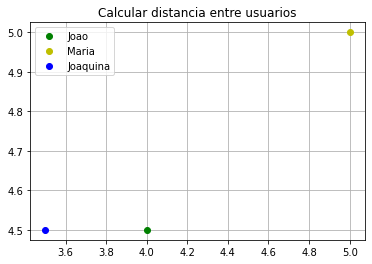

In [20]:
joaquina = np.array([3.5, 4.5])
plt.plot(4, 4.5, 'go')
plt.plot(5, 5, 'yo')
plt.plot(3.5, 4.5, 'bo')
plt.grid()
plt.legend(['Joao', 'Maria', 'Joaquina'])
plt.title('Calcular distancia entre usuarios')

In [21]:
print(pitagoras(joao, maria))
print(pitagoras(joao, joaquina))

1.118033988749895
0.5


# Distância entre usuários do dataset

In [22]:
def distancia_vetores(a,b):
  return np.linalg.norm(a-b)

In [23]:
notas_usuario = notas.query('usuarioId==1')
notas_usuario = notas_usuario[['filmeId', 'nota']].set_index('filmeId')

In [24]:
notas_usuario.head()

,nota
filmeId,
1,4.0
3,4.0
6,4.0
47,5.0
50,5.0


In [25]:
def notas_do_usuario(usuario):
  notas_usuario = notas.query('usuarioId==%d' %usuario)
  notas_usuario = notas_usuario[['filmeId', 'nota']].set_index('filmeId')
  return notas_usuario

In [26]:
usuario_1 = notas_do_usuario(1)
usuario_4 = notas_do_usuario(4)

In [27]:
diferencas = usuario_1.join(usuario_4, lsuffix='_esq', rsuffix='_dir').dropna()

In [28]:
distancia_vetores(diferencas['nota_esq'], diferencas['nota_dir'])

11.135528725660043

In [29]:
def distancia_usuarios(usuarioId_1, usuarioId_2):
  notas1 = notas_do_usuario(usuarioId_1)
  notas2 = notas_do_usuario(usuarioId_2)
  diferencas = notas1.join(notas2, lsuffix='_esq', rsuffix='_dir').dropna()
  distancia = distancia_vetores(diferencas['nota_esq'], diferencas['nota_dir'])
  return [usuarioId_1, usuarioId_2, distancia]


In [30]:
distancia_usuarios(1, 4)

[1, 4, 11.135528725660043]

In [31]:
quantidade_usuarios = len(notas['usuarioId'].unique())
print('Temos %d usuarios no dataset' %quantidade_usuarios)

Temos 610 usuarios no dataset


In [32]:
def distancia_todos(voceId):
  todos_usuarios = notas['usuarioId'].unique()
  distancias = [distancia_usuarios(voceId, usuarioId) for usuarioId in todos_usuarios]
  distancias = pd.DataFrame(distancias, columns=['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [33]:
distancia_todos(1).head(10)

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,1.414214
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657
5,1,6,8.602325
6,1,7,7.106335
7,1,8,3.741657
8,1,9,1.000000
9,1,10,7.858117


# Usuários sem nada em comum, devem ser distanciados.


In [48]:
def distancia_usuarios(usuarioId_1, usuarioId_2, minimo=5):
  notas1 = notas_do_usuario(usuarioId_1)
  notas2 = notas_do_usuario(usuarioId_2)
  diferencas = notas1.join(notas2, lsuffix='_esq', rsuffix='_dir').dropna()

  if len(diferencas) < minimo:
    return [usuarioId_1, usuarioId_2, 100000]
  else:
    distancia = distancia_vetores(diferencas['nota_esq'], diferencas['nota_dir'])
    return [usuarioId_1, usuarioId_2, distancia]

In [35]:
distancia_todos(1).head()

,voce,outra_pessoa,distancia
0,1,1,0.000000
1,1,2,100000.000000
2,1,3,8.200610
3,1,4,11.135529
4,1,5,3.741657


In [36]:
def mais_proximos(voceId):
  distancias = distancia_todos(voceId)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voceId)
  return distancias

In [37]:
mais_proximos(1).head()

,voce,distancia
outra_pessoa,,
77,1,0.000000
511,1,0.500000
366,1,0.707107
523,1,1.000000
49,1,1.000000


#Parâmetros para teste

In [56]:
def mais_proximos(voceId, numeros_usuarios_analisados = None):
  distancias = distancia_todos(voceId, numeros_usuarios_analisados)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voceId)
  return distancias

In [50]:
def distancia_todos(voceId, numeros_usuarios_analisados = None):
  todos_usuarios = notas['usuarioId'].unique()
  if n:
    todos_usuarios = todos_usuarios[:numeros_usuarios_analisados]
  distancias = [distancia_usuarios(voceId, usuarioId) for usuarioId in todos_usuarios]
  distancias = pd.DataFrame(distancias, columns=['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [51]:
mais_proximos(1, numeros_usuarios_analisados=50)

,voce,distancia
outra_pessoa,,
49,1,1.000000
9,1,1.000000
13,1,1.414214
25,1,1.414214
30,1,1.802776
35,1,2.236068
26,1,2.236068
46,1,3.316625
8,1,3.741657


In [57]:
def distancia_usuarios(usuarioId_1, usuarioId_2, minimo=5):
  notas1 = notas_do_usuario(usuarioId_1)
  notas2 = notas_do_usuario(usuarioId_2)
  diferencas = notas1.join(notas2, lsuffix='_esq', rsuffix='_dir').dropna()

  if len(diferencas) < minimo:
    return None
  else:
    distancia = distancia_vetores(diferencas['nota_esq'], diferencas['nota_dir'])
    return [usuarioId_1, usuarioId_2, distancia]

In [60]:
def distancia_todos(voceId, numeros_usuarios_analisados = None):
  todos_usuarios = notas['usuarioId'].unique()
  if numeros_usuarios_analisados:
    todos_usuarios = todos_usuarios[:numeros_usuarios_analisados]
  distancias = [distancia_usuarios(voceId, usuarioId) for usuarioId in todos_usuarios]
  distancias = list(filter(None, distancias))
  distancias = pd.DataFrame(distancias, columns=['voce', 'outra_pessoa', 'distancia'])
  return distancias

In [61]:
mais_proximos(1, numeros_usuarios_analisados=100)

,voce,distancia
outra_pessoa,,
77,1,0.000000
9,1,1.000000
49,1,1.000000
65,1,1.322876
90,1,1.414214
...,...,...
57,1,13.190906
91,1,13.518506
28,1,14.882876


In [76]:
def sugerir(voceId, numeros_usuarios_analisados=None):
  notas_voce = notas_do_usuario(voceId)
  filmes_ja_vistos = notas_voce.index

  similares = mais_proximos(1, numeros_usuarios_analisados)
  similar = similares.iloc[0].name
  notas_do_similar = notas_do_usuario(similar)
  notas_do_similar = notas_do_similar.drop(filmes_ja_vistos, errors='ignore')
  recomendacoes = notas_do_similar.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes)

In [77]:
sugerir(1, 50).head()

,nota,titulo,generos,total_votos,nota_media
filmeId,,,,,
1200,4.5,Aliens (1986),Action|Adventure|Horror|Sci-Fi,126.0,3.964286
4022,4.5,Cast Away (2000),Drama,100.0,3.700000
47099,4.5,"Pursuit of Happyness, The (2006)",Drama,46.0,3.793478
79132,4.5,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
109487,4.5,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151


In [78]:
sugerir(1).head()

,nota,titulo,generos,total_votos,nota_media
filmeId,,,,,
8636,5.0,Spider-Man 2 (2004),Action|Adventure|Sci-Fi|IMAX,79.0,3.803797
58559,5.0,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
33794,5.0,Batman Begins (2005),Action|Crime|IMAX,116.0,3.862069
4993,5.0,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
5349,5.0,Spider-Man (2002),Action|Adventure|Sci-Fi|Thriller,122.0,3.540984


#Sugerindo baseado em várias pessoas

In [79]:
def mais_proximos(voceId, n_mais_proximos=10, numeros_usuarios_analisados = None):
  distancias = distancia_todos(voceId, numeros_usuarios_analisados)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voceId)
  return distancias.head(n_mais_proximos)

In [82]:
mais_proximos(1, n_mais_proximos=2 ,numeros_usuarios_analisados=300)

,voce,distancia
outra_pessoa,,
77,1,0.0
258,1,1.0


In [90]:
def sugerir(voce, n_mais_proximos=10, numeros_usuarios_analisados=None):
  notas_voce = notas_do_usuario(voceId)
  filmes_ja_vistos = notas_voce.index

  similares = mais_proximos(1, n_mais_proximos, numeros_usuarios_analisados)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]

  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes)
  

In [95]:
sugerir(1, 10, 300).head()

,nota,titulo,generos,total_votos,nota_media
filmeId,,,,,
187593,5.0,Deadpool 2 (2018),Action|Comedy|Sci-Fi,12.0,3.875000
802,5.0,Phenomenon (1996),Drama|Romance,46.0,3.336957
534,5.0,Shadowlands (1993),Drama|Romance,14.0,3.607143
1172,5.0,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama,34.0,4.161765
515,5.0,"Remains of the Day, The (1993)",Drama|Romance,24.0,3.604167


In [96]:
def knn(voceId, k_mais_proximos=10, numeros_usuarios_analisados = None):
  distancias = distancia_todos(voceId, numeros_usuarios_analisados)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voceId)
  return distancias.head(k_mais_proximos)

In [97]:
def sugerir(voce, k_mais_proximos=10, numeros_usuarios_analisados=None):
  notas_voce = notas_do_usuario(voceId)
  filmes_ja_vistos = notas_voce.index

  similares = knn(1, k_mais_proximos, numeros_usuarios_analisados)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]

  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  recomendacoes = recomendacoes.sort_values('nota', ascending=False)
  return recomendacoes.join(filmes)

#Testar um novo usuário

In [107]:
filmes.loc[[1, 7, 187593, 745, 109487, 79132]]
dados = [[1, 4], [7, 2], [187593, 4], [745, 2], [109487, 4.5], [79132, 5]]

In [109]:
def novo_usuario(dados):
  novo_usuario = notas['usuarioId'].max()+1
  notas_novo_usuario = pd.DataFrame(dados, columns=['filmeId', 'nota'])
  notas_novo_usuario['usuarioId'] = novo_usuario
  return pd.concat([notas, notas_novo_usuario])

In [111]:
novo_usuario(dados).tail()

,usuarioId,filmeId,nota,momento
1,611,7,2.0,NaN
2,611,187593,4.0,NaN
3,611,745,2.0,NaN
4,611,109487,4.5,NaN
5,611,79132,5.0,NaN


In [112]:
sugerir(611).head()

,nota,titulo,generos,total_votos,nota_media
filmeId,,,,,
1704,5.0,Good Will Hunting (1997),Drama|Romance,141.0,4.078014
57504,5.0,"Girl Who Leapt Through Time, The (Toki o kaker...",Animation|Comedy|Drama|Romance|Sci-Fi,10.0,4.100000
38304,5.0,No Direction Home: Bob Dylan (2005),Documentary,4.0,4.625000
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
2300,5.0,"Producers, The (1968)",Comedy,33.0,3.969697


#Utilizar somente filmes com mais de 50 votos

In [114]:
notas = notas.set_index('filmeId').loc[filmes_mais_50_votos.index]
notas.head()

,usuarioId,nota,momento
filmeId,,,
1,1,4.0,964982703
1,5,4.0,847434962
1,7,4.5,1106635946
1,15,2.5,1510577970
1,17,4.5,1305696483


In [115]:
notas = notas.reset_index()
notas.head()

,filmeId,usuarioId,nota,momento
0,1,1,4.0,964982703
1,1,5,4.0,847434962
2,1,7,4.5,1106635946
3,1,15,2.5,1510577970
4,1,17,4.5,1305696483


In [116]:
sugerir(611).head()

,nota,titulo,generos,total_votos,nota_media
filmeId,,,,,
56174,5.0,I Am Legend (2007),Action|Horror|Sci-Fi|Thriller|IMAX,62.0,3.483871
48394,5.0,"Pan's Labyrinth (Laberinto del fauno, El) (2006)",Drama|Fantasy|Thriller,81.0,3.814815
1196,5.0,Star Wars: Episode V - The Empire Strikes Back...,Action|Adventure|Sci-Fi,211.0,4.215640
1197,5.0,"Princess Bride, The (1987)",Action|Adventure|Comedy|Fantasy|Romance,142.0,4.232394
1198,5.0,Raiders of the Lost Ark (Indiana Jones and the...,Action|Adventure,200.0,4.207500


In [125]:
def sugerir(voce, k_mais_proximos=10, numeros_usuarios_analisados=None):
  notas_voce = notas_do_usuario(voceId)
  filmes_ja_vistos = notas_voce.index

  similares = knn(1, k_mais_proximos, numeros_usuarios_analisados)
  usuarios_similares = similares.index
  notas_dos_similares = notas.set_index("usuarioId").loc[usuarios_similares]

  recomendacoes = notas_dos_similares.groupby('filmeId').mean()[['nota']]
  aparicoes = notas_dos_similares.groupby('filmeId').count()[['nota']]
  filtro_minimo = k_mais_proximos/2
  recomendacoes = recomendacoes.join(aparicoes, lsuffix='_media_dos_usuarios', rsuffix='_aparicoes_nos_usuarios')
  recomendacoes = recomendacoes.query('nota_aparicoes_nos_usuarios >= %.2f' %filtro_minimo)
  recomendacoes = recomendacoes.sort_values('nota_media_dos_usuarios', ascending=False)
  recomendacoes = recomendacoes.drop(filmes_ja_vistos, errors='ignore')
  return recomendacoes.join(filmes)
   

In [120]:
def knn(voceId, k_mais_proximos=10, numeros_usuarios_analisados = None):
  distancias = distancia_todos(voceId, numeros_usuarios_analisados)
  distancias = distancias.sort_values('distancia')
  distancias = distancias.set_index('outra_pessoa').drop(voceId, errors='ignore')
  return distancias.head(k_mais_proximos)

In [126]:
sugerir(1, numeros_usuarios_analisados=500)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_votos,nota_media
filmeId,,,,,,
318,4.583333,6,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022


In [127]:
sugerir(611)

,nota_media_dos_usuarios,nota_aparicoes_nos_usuarios,titulo,generos,total_votos,nota_media
filmeId,,,,,,
7153,4.750000,6,"Lord of the Rings: The Return of the King, The...",Action|Adventure|Drama|Fantasy,185.0,4.118919
58559,4.750000,6,"Dark Knight, The (2008)",Action|Crime|Drama|IMAX,149.0,4.238255
4993,4.714286,7,"Lord of the Rings: The Fellowship of the Ring,...",Adventure|Fantasy,198.0,4.106061
318,4.583333,6,"Shawshank Redemption, The (1994)",Crime|Drama,317.0,4.429022
109487,4.583333,6,Interstellar (2014),Sci-Fi|IMAX,73.0,3.993151
79132,4.357143,7,Inception (2010),Action|Crime|Drama|Mystery|Sci-Fi|Thriller|IMAX,143.0,4.066434
